In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def f(x):
    return np.sin(x) + 0.5 * x

In [3]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 50)

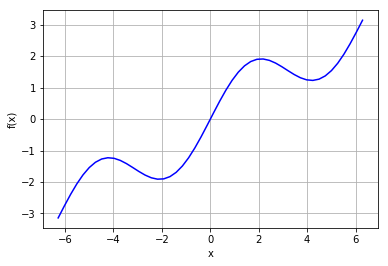

In [4]:
plt.plot(x, f(x), 'b')
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [5]:
reg = np.polyfit(x, f(x), deg=1)
ry = np.polyval(reg, x)

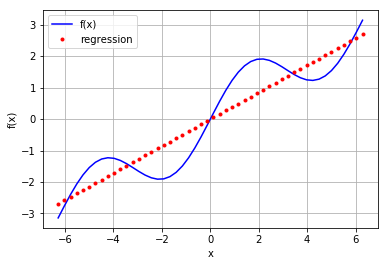

In [6]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [7]:
reg = np.polyfit(x, f(x), deg=5)
ry = np.polyval(reg, x)

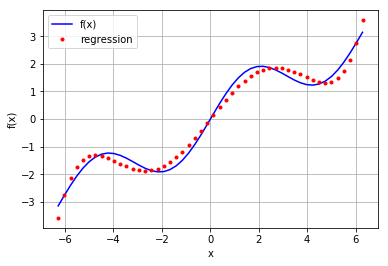

In [8]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [9]:
reg = np.polyfit(x, f(x), 7)
ry = np.polyval(reg, x)

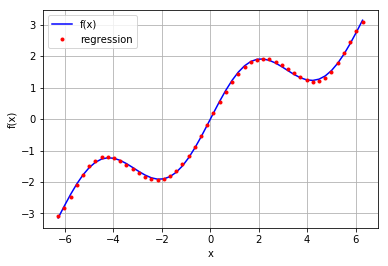

In [10]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [11]:
np.allclose(f(x), ry)

False

In [12]:
np.sum((f(x) - ry) ** 2) / len(x)

0.0017769134759517704

In [13]:
matrix = np.zeros((3 + 1, len(x)))
matrix[3, :] = x ** 3
matrix[2, :] = x ** 2
matrix[1, :] = x
matrix[0, :] = 1

In [14]:
reg = np.linalg.lstsq(matrix.T, f(x))[0]

In [15]:
reg

array([  1.52685368e-14,   5.62777448e-01,  -1.11022302e-15,
        -5.43553615e-03])

In [16]:
ry = np.dot(reg, matrix)

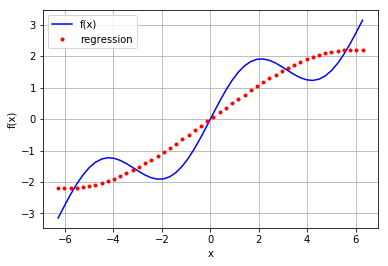

In [17]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [18]:
matrix[3, :] = np.sin(x)
reg = np.linalg.lstsq(matrix.T, f(x))[0]
ry = np.dot(reg, matrix)

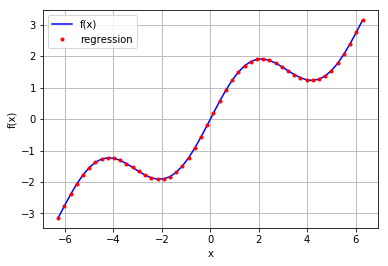

In [19]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, ry, 'r.', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [20]:
np.allclose(f(x), ry)

True

In [21]:
np.sum((f(x) - ry) ** 2) / len(x)

1.8541312760604798e-31

In [22]:
reg

array([  9.26243218e-17,   5.00000000e-01,   0.00000000e+00,
         1.00000000e+00])

In [23]:
xn = np.linspace(-2 * np.pi, 2 * np.pi, 50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))
yn = f(xn) + 0.25 * np.random.standard_normal(len(xn))

In [24]:
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg, xn)

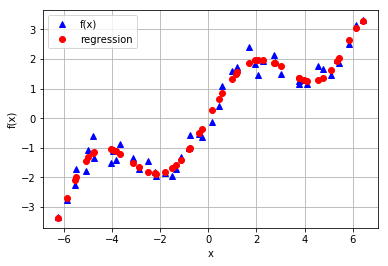

In [25]:
plt.plot(xn, yn, 'b^', label='f(x)')
plt.plot(xn, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [26]:
xu = np.random.rand(50) * 4 * np.pi - 2 * np.pi
yu = f(xu)

In [27]:
print xu[:10].round(2)
print yu[:10].round(2)

[-2.91 -5.6  -4.79 -4.65 -3.39 -3.47 -0.87  0.21  2.36 -1.84]
[-1.68 -2.17 -1.4  -1.33 -1.45 -1.41 -1.2   0.31  1.88 -1.88]


In [28]:
reg = np.polyfit(xu, yu, 5) 
ry = np.polyval(reg, xu)

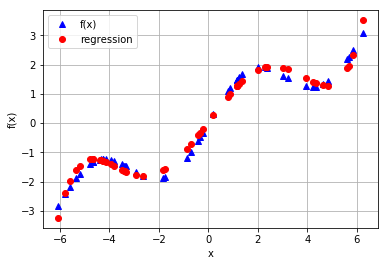

In [29]:
plt.plot(xu, yu, 'b^', label='f(x)')
plt.plot(xu, ry, 'ro', label='regression')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [30]:
def fm((x, y)):
    return np.sin(x) + 0.25 * x + np.sqrt(y) + 0.05 * y ** 2

In [31]:
x = np.linspace(0, 10, 20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)
# generates 2-d grids out of the 1-d arrays
Z = fm((X, Y))
x = X.flatten()
y = Y.flatten()
# yields 1-d arrays from the 2-d grids

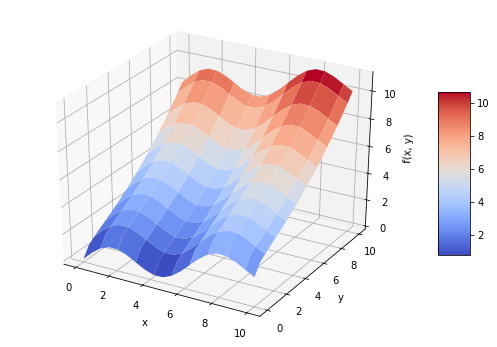

In [32]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [33]:
matrix = np.zeros((len(x), 6 + 1))
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1

In [34]:
import statsmodels.api as sm

/Users/shaolongchen/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [35]:
model = sm.OLS(fm((x, y)), matrix).fit()

In [36]:
model.rsquared

1.0

In [37]:
a = model.params
a

array([ -4.16333634e-15,   2.50000000e-01,  -4.24660307e-15,
        -3.40005801e-16,   5.00000000e-02,   1.00000000e+00,
         1.00000000e+00])

In [38]:
def reg_func(a, (x, y)):
    f6 = a[6] * np.sqrt(y)
    f5 = a[5] * np.sin(x)
    f4 = a[4] * y ** 2
    f3 = a[3] * x ** 2
    f2 = a[2] * y
    f1 = a[1] * x
    f0 = a[0] * 1
    return (f6 + f5 + f4 + f3 + f2 + f1 + f0)

In [39]:
RZ = reg_func(a, (X, Y))

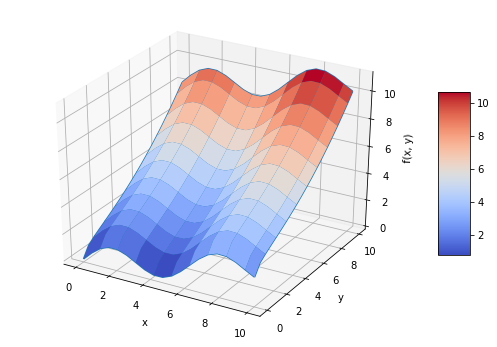

In [40]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
surf2 = ax.plot_wireframe(X, Y, RZ, rstride=2, cstride=2, label='regression')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [41]:
import scipy.interpolate as spi

In [42]:
x = np.linspace(-2 * np.pi, 2 * np.pi, 25)

In [43]:
def f(x):
    return np.sin(x) + 0.5 * x

In [44]:
ipo = spi.splrep(x, f(x), k=1)

In [45]:
iy = spi.splev(x, ipo)

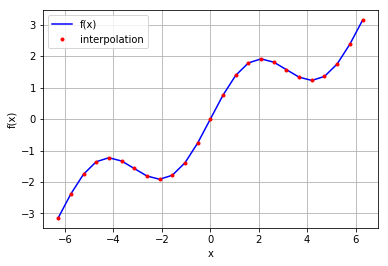

In [46]:
plt.plot(x, f(x), 'b', label='f(x)')
plt.plot(x, iy, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [47]:
np.allclose(f(x), iy)

True

In [48]:
xd = np.linspace(1.0, 3.0, 50)
iyd = spi.splev(xd, ipo)

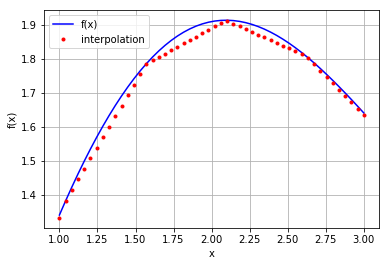

In [49]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [50]:
ipo = spi.splrep(x, f(x), k=3)       
iyd = spi.splev(xd, ipo)

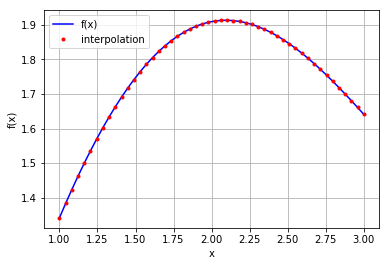

In [51]:
plt.plot(xd, f(xd), 'b', label='f(x)')
plt.plot(xd, iyd, 'r.', label='interpolation')
plt.legend(loc=0)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('f(x)')

In [52]:
np.allclose(f(xd), iyd)

False

In [53]:
np.sum((f(xd) - iyd) ** 2) / len(xd)

1.1349319851436892e-08

In [54]:
def fm((x, y)):
    return (np.sin(x) + 0.05 * x ** 2 + np.sin(y) + 0.05 * y ** 2)

In [55]:
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
X, Y = np.meshgrid(x, y)
Z = fm((X, Y))

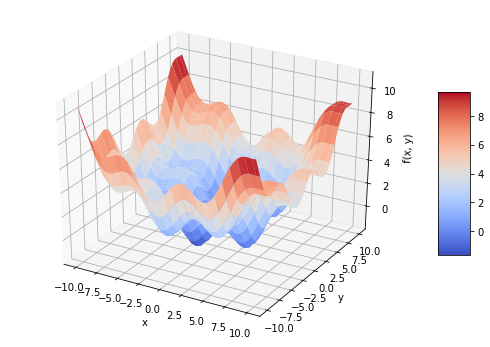

In [56]:
fig = plt.figure(figsize=(9, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
fig.colorbar(surf, shrink=0.5, aspect=5)

In [57]:
import scipy.optimize as spo